In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

plt.rcParams["font.size"] = 15

In [2]:
sc = SparkContext('local')
sqlCtx = SQLContext( sc )

## 1. k.txt 에 있는 단어의 갯수를 구하시오.

In [3]:
k = sc.textFile('../data/data1/k.txt')

In [4]:
k.flatMap( lambda x: x.split() ).map( lambda x: (x,1) ).reduceByKey(lambda a,b: a+b ).sortBy(lambda v: v[1], ascending=False ).collect()

[('원내대표는', 7),
 ('질문에', 7),
 ('것은', 5),
 ('여야', 4),
 ('하는', 4),
 ('말했다.', 4),
 ('3당', 3),
 ('위해', 3),
 ('문', 3),
 ('이인영', 3),
 ('나경원', 3),
 ('오신환', 3),
 ('바른미래당', 3),
 ('회동을', 3),
 ('갖고', 3),
 ('국회정상화에', 3),
 ('민주당', 3),
 ('6월', 3),
 ('후보자', 3),
 ('국세청장', 3),
 ('기자들과', 3),
 ('만나', 3),
 ('전했다.', 3),
 ('게', 3),
 ('나', 3),
 ('대한', 3),
 ("것이냐'는", 3),
 ('국회에서', 3),
 ('생각한다"고', 3),
 ('문희상', 2),
 ('국회의장과', 2),
 ('교섭단체', 2),
 ('18일', 2),
 ('국회정상화를', 2),
 ('자유한국당,', 2),
 ('오후', 2),
 ('이', 2),
 ('합의할', 2),
 ('요청한', 2),
 ('것으로', 2),
 ('한국당이', 2),
 ('경우', 2),
 ('윤석열', 2),
 ('검찰총장', 2),
 ('김현준', 2),
 ('일정이', 2),
 ('제대로', 2),
 ('합의를', 2),
 ('이어', 2),
 ('묻는', 2),
 ('것', 2),
 ('후보자에', 2),
 ('한', 2),
 ('것이', 2),
 ('일부', 2),
 ('문제가', 2),
 ('그', 2),
 ('국회가', 2),
 ('있다.', 2),
 ('대해', 2),
 ('민주당이', 2),
 ('대승적', 2),
 ('오', 2),
 ('있는', 2),
 ('위한', 2),
 ('해야', 2),
 ('대표가', 1),
 ('머리를', 1),
 ('맞댔지만', 1),
 ('의미있는', 1),
 ('결론을', 1),
 ('내리지', 1),
 ('못했다.', 1),
 ('의장과', 1),
 ('더불어민주당,', 1),
 ('이날', 1),
 ('국회의장실에서'

## 2. births.txt 파일을 이용하여 구하시오

In [5]:
birth = sc.textFile('../data/data1/births.txt')

In [6]:
births = birth.map( lambda v: v.split(','))
births.collect()

[['1880', ' 90993', ' 110491'],
 ['1881', ' 91954', ' 100745'],
 ['1882', ' 107850', ' 113688'],
 ['1883', ' 112321', ' 104629'],
 ['1884', ' 129022', ' 114445'],
 ['1885', ' 133055', ' 107800'],
 ['1886', ' 144535', ' 110784'],
 ['1887', ' 145982', ' 101414'],
 ['1888', ' 178627', ' 120853'],
 ['1889', ' 178366', ' 110584'],
 ['1890', ' 190377', ' 111025'],
 ['1891', ' 185482', ' 101196'],
 ['1892', ' 212346', ' 122037'],
 ['1893', ' 212906', ' 112317'],
 ['1894', ' 222922', ' 115772'],
 ['1895', ' 233630', ' 117398'],
 ['1896', ' 237920', ' 119570'],
 ['1897', ' 234202', ' 112758'],
 ['1898', ' 258770', ' 122693'],
 ['1899', ' 233023', ' 106212'],
 ['1900', ' 299828', ' 150499'],
 ['1901', ' 239348', ' 106471'],
 ['1902', ' 264077', ' 122659'],
 ['1903', ' 261973', ' 119234'],
 ['1904', ' 275371', ' 128125'],
 ['1905', ' 291629', ' 132319'],
 ['1906', ' 295303', ' 133159'],
 ['1907', ' 318566', ' 146833'],
 ['1908', ' 334313', ' 154344'],
 ['1909', ' 347228', ' 163999'],
 ['1910', ' 

In [7]:
man_birth_data = births.map(lambda v:float(v[1]))
girl_birth_data = births.map(lambda v:float(v[2]))

### 1) 남아수의 합과 평균을 구하시오

In [8]:
round(man_birth_data.sum(),2), round(man_birth_data.mean(),2)

(161802441.0, 1225776.07)

### 2) 여아수의 합과 평균을 구하시오

In [9]:
round(girl_birth_data.sum(),2), round(girl_birth_data.mean(),2)

(164392696.0, 1245399.21)

### 3) 남아수가 높은 탑 5를 구하시오

In [10]:
births.sortBy(lambda v : int(v[1]), ascending=False).take(5)

[['1957', ' 2044160', ' 2155866'],
 ['1959', ' 2023044', ' 2133509'],
 ['1960', ' 2022093', ' 2132717'],
 ['1961', ' 2017316', ' 2122502'],
 ['1958', ' 2010884', ' 2120712']]

### 4) 전체 남아수의 비율을 구하시요.

In [11]:
mans= births.map(lambda v: int(v[1])).sum()
man_girls = births.map(lambda v: int(v[1])+ int(v[2])).sum()

In [12]:
round(mans/man_girls,3)

0.496

### 5) 여아수를 10등분 했을때 각계급의 수를 구하시요

In [13]:
girl_birth_data1 = girl_birth_data.collect() 
pd.cut(girl_birth_data1,10).value_counts()

(98689.879, 306257.1]     32
(306257.1, 511769.2]       1
(511769.2, 717281.3]       2
(717281.3, 922793.4]       2
(922793.4, 1128305.5]     22
(1128305.5, 1333817.6]     3
(1333817.6, 1539329.7]     4
(1539329.7, 1744841.8]    11
(1744841.8, 1950353.9]    30
(1950353.9, 2155866.0]    25
dtype: int64

In [14]:
a, b= girl_birth_data.histogram([girl_birth_data.min() , 
                           girl_birth_data.min() + ((girl_birth_data.max() - girl_birth_data.min())/10),
                           girl_birth_data.min() + ((girl_birth_data.max() - girl_birth_data.min())/10)*2,
                           girl_birth_data.min() + ((girl_birth_data.max() - girl_birth_data.min())/10)*3,
                           girl_birth_data.min() + ((girl_birth_data.max() - girl_birth_data.min())/10)*4,
                           girl_birth_data.min() + ((girl_birth_data.max() - girl_birth_data.min())/10)*5,
                           girl_birth_data.min() + ((girl_birth_data.max() - girl_birth_data.min())/10)*6,
                           girl_birth_data.min() + ((girl_birth_data.max() - girl_birth_data.min())/10)*7,
                           girl_birth_data.min() + ((girl_birth_data.max() - girl_birth_data.min())/10)*8,
                           girl_birth_data.min() + ((girl_birth_data.max() - girl_birth_data.min())/10)*9,
                           girl_birth_data.max()])

print(b)

[32, 1, 2, 2, 22, 3, 4, 11, 30, 25]


## CCTV 문제

In [15]:
cctvDF = sqlCtx.read.csv('../data/data1/CCTV_in_Seoul.csv', header=True,
                        inferSchema = True)
cctvDF

DataFrame[기관명: string, 소계: int, 2013년도 이전: int, 2014년: int, 2015년: int, 2016년: int]

In [16]:
cctvDF.show()

+--------+----+-------------+------+------+------+
|  기관명|소계|2013년도 이전|2014년|2015년|2016년|
+--------+----+-------------+------+------+------+
|  강남구|2780|         1292|   430|   584|   932|
|  강동구| 773|          379|    99|   155|   377|
|  강북구| 748|          369|   120|   138|   204|
|  강서구| 884|          388|   258|   184|    81|
|  관악구|1496|          846|   260|   390|   613|
|  광진구| 707|          573|    78|    53|   174|
|  구로구|1561|         1142|   173|   246|   323|
|  금천구|1015|          674|    51|   269|   354|
|  노원구|1265|          542|    57|   451|   516|
|  도봉구| 485|          238|   159|    42|   386|
|동대문구|1294|         1070|    23|   198|   579|
|  동작구|1091|          544|   341|   103|   314|
|  마포구| 574|          314|   118|   169|   379|
|서대문구| 962|          844|    50|    68|   292|
|  서초구|1930|         1406|   157|   336|   398|
|  성동구|1062|          730|    91|   241|   265|
|  성북구|1464|         1009|    78|   360|   204|
|  송파구| 618|          529|    21|    68|   46

In [17]:
cctvDF.createOrReplaceTempView('cctv')

### 1. 기관명이 '강'글자가 포함된  데이터를 가져오시요

In [18]:
sql = "select * from cctv where `기관명` like '%강%'" 
cctvDF = sqlCtx.sql(sql) 
cctvDF.show()

+------+----+-------------+------+------+------+
|기관명|소계|2013년도 이전|2014년|2015년|2016년|
+------+----+-------------+------+------+------+
|강남구|2780|         1292|   430|   584|   932|
|강동구| 773|          379|    99|   155|   377|
|강북구| 748|          369|   120|   138|   204|
|강서구| 884|          388|   258|   184|    81|
+------+----+-------------+------+------+------+



### 2. 기관명, cctv증가율 을 출력하시요.
- 증가율:  (14+15+16)/(2013년이전 )

In [19]:
sql= """select 
            `기관명`,
            round((`2014년`+`2015년`+`2016년`)/`2013년도 이전`,2) as `증가율`
        from cctv
            order by `증가율` desc"""
sqlDF = sqlCtx.sql(sql)
sqlDF.show()

+--------+------+
|  기관명|증가율|
+--------+------+
|  종로구|  2.49|
|  도봉구|  2.47|
|  마포구|  2.12|
|  노원구|  1.89|
|  강동구|  1.66|
|영등포구|  1.58|
|  강남구|  1.51|
|  관악구|  1.49|
|    중구|  1.48|
|  동작구|  1.39|
|  강서구|  1.35|
|  강북구|  1.25|
|  송파구|  1.04|
|  금천구|   1.0|
|  은평구|  0.85|
|  성동구|  0.82|
|  중랑구|   0.8|
|동대문구|  0.75|
|  구로구|  0.65|
|  성북구|  0.64|
+--------+------+
only showing top 20 rows



### 3. 증가율이 가장높은 top 5를 보여주시요

In [20]:
sql= """select 
            `기관명`,
            round((`2014년`+`2015년`+`2016년`)/`2013년도 이전`,2) as `증가율`
        from cctv
            order by `증가율` desc
            limit 5"""
sqlDF = sqlCtx.sql(sql)
sqlDF.show()

+------+------+
|기관명|증가율|
+------+------+
|종로구|  2.49|
|도봉구|  2.47|
|마포구|  2.12|
|노원구|  1.89|
|강동구|  1.66|
+------+------+



### 4. 기관이라는 컬럼을 만들고 기관명에서 마지막 '구'라는 글자를 제한 글자로 데이터를 구성하시요
- (예)강남,강동,강북....

In [37]:
sql = "select * , replace(`기관명`,'구$',' ') as `기관` from cctv" 
cctvDF = sqlCtx.sql(sql) 
cctvDF.show()

+--------+----+-------------+------+------+------+--------+
|  기관명|소계|2013년도 이전|2014년|2015년|2016년|    기관|
+--------+----+-------------+------+------+------+--------+
|  강남구|2780|         1292|   430|   584|   932|  강남구|
|  강동구| 773|          379|    99|   155|   377|  강동구|
|  강북구| 748|          369|   120|   138|   204|  강북구|
|  강서구| 884|          388|   258|   184|    81|  강서구|
|  관악구|1496|          846|   260|   390|   613|  관악구|
|  광진구| 707|          573|    78|    53|   174|  광진구|
|  구로구|1561|         1142|   173|   246|   323|  구로구|
|  금천구|1015|          674|    51|   269|   354|  금천구|
|  노원구|1265|          542|    57|   451|   516|  노원구|
|  도봉구| 485|          238|   159|    42|   386|  도봉구|
|동대문구|1294|         1070|    23|   198|   579|동대문구|
|  동작구|1091|          544|   341|   103|   314|  동작구|
|  마포구| 574|          314|   118|   169|   379|  마포구|
|서대문구| 962|          844|    50|    68|   292|서대문구|
|  서초구|1930|         1406|   157|   336|   398|  서초구|
|  성동구|1062|          730|  

### 5. 2015년도 cctv 총합을 구하시요.

In [22]:
sql = "select sum(`2015년`) as `2015년 cctv 총합` from cctv "
sqlDF = sqlCtx.sql(sql)
sqlDF.show()

+----------------+
|2015년 cctv 총합|
+----------------+
|            5130|
+----------------+



### 6. 2014년도 2015년도 cctv데이터에 대한 바차트를 그리시요(x축 기관명임)

In [23]:
# 필요한 데이터만 추출
sql= """select 
            `기관명`,
            `2014년`, 
            `2015년`
        from cctv """
cctv_DF_1415 = sqlCtx.sql(sql)
cctv_DF_1415.show()

+--------+------+------+
|  기관명|2014년|2015년|
+--------+------+------+
|  강남구|   430|   584|
|  강동구|    99|   155|
|  강북구|   120|   138|
|  강서구|   258|   184|
|  관악구|   260|   390|
|  광진구|    78|    53|
|  구로구|   173|   246|
|  금천구|    51|   269|
|  노원구|    57|   451|
|  도봉구|   159|    42|
|동대문구|    23|   198|
|  동작구|   341|   103|
|  마포구|   118|   169|
|서대문구|    50|    68|
|  서초구|   157|   336|
|  성동구|    91|   241|
|  성북구|    78|   360|
|  송파구|    21|    68|
|  양천구|   142|    30|
|영등포구|   214|   195|
+--------+------+------+
only showing top 20 rows



In [24]:
# 판다스 데이터프레임으로 변경
cctv_DF_1415 =cctv_DF_1415.toPandas()

In [25]:
# 기관명을 인덱스로 설정
cctv_DF_1415.set_index('기관명', inplace=True)

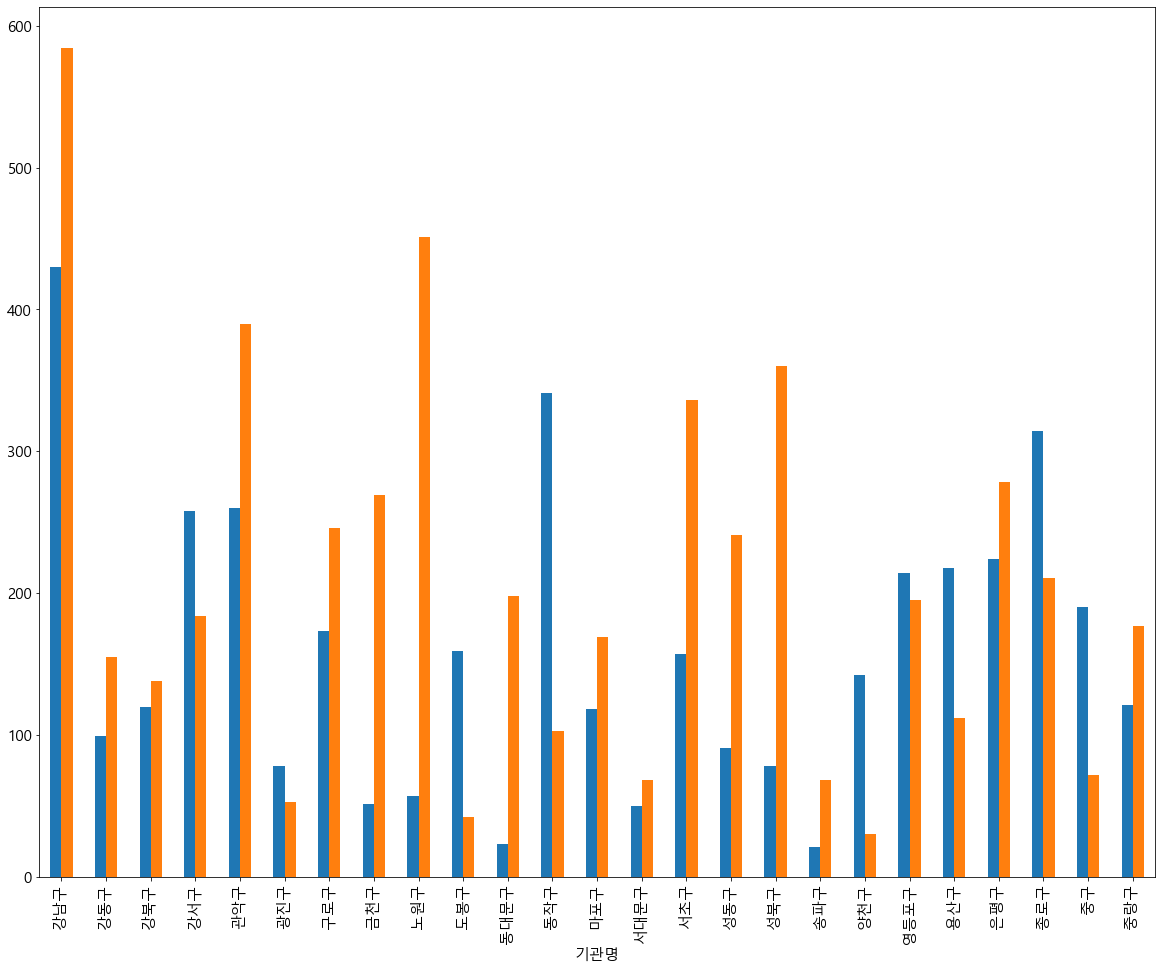

In [26]:
cctv_DF_1415.plot(kind='bar', figsize=(20,16), rot=90,legend= None)

### 7. cctv가 가장많은 기관명과 갯수를 구하시요

In [27]:
sql= """select `기관명`,`소계`
        from cctv
        order by `소계` desc
        limit 1"""
sqlDF = sqlCtx.sql(sql)
sqlDF.show()

+------+----+
|기관명|소계|
+------+----+
|강남구|2780|
+------+----+



### 8. 현황이라는 컬럼을 추가하고 cctv총갯수가 1500개 이상이면 '매우많음' 1000개이상이면 '많음' 나머지 보통으로 표시하시요

In [28]:
sql= """select `기관명`,`소계`,
        case 
            when `소계` >= 1500 then '매우많음'
            when `소계` >= 1000 then '많음'
            else '보통'
        end as `현황`
        from cctv
        order by `소계` desc"""
sqlDF = sqlCtx.sql(sql)
sqlDF.show()

+--------+----+--------+
|  기관명|소계|    현황|
+--------+----+--------+
|  강남구|2780|매우많음|
|  양천구|2034|매우많음|
|  서초구|1930|매우많음|
|  은평구|1873|매우많음|
|  용산구|1624|매우많음|
|  구로구|1561|매우많음|
|  관악구|1496|    많음|
|  성북구|1464|    많음|
|동대문구|1294|    많음|
|  노원구|1265|    많음|
|  동작구|1091|    많음|
|  성동구|1062|    많음|
|  금천구|1015|    많음|
|  종로구|1002|    많음|
|서대문구| 962|    보통|
|영등포구| 904|    보통|
|  강서구| 884|    보통|
|  강동구| 773|    보통|
|  강북구| 748|    보통|
|  광진구| 707|    보통|
+--------+----+--------+
only showing top 20 rows



## grade 문제

In [29]:
gradeDF = sqlCtx.read.csv('../data/data1/grade.csv', header=True,
                        inferSchema = True)
gradeDF

DataFrame[학년: string, 과목: string, 결과: string, 중간: int, 기말: int]

In [30]:
gradeDF.createOrReplaceTempView('grade')

In [31]:
gradeDF.show()

+-----+----+-----+----+----+
| 학년|과목| 결과|중간|기말|
+-----+----+-----+----+----+
|1학년|국어| 좋음|  80|  90|
|1학년|국어| 나쁨|  50|  40|
|1학년|국어| 나쁨|  20|  50|
|1학년|수학| 좋음|  83|  95|
|1학년|수학| 좋음|  93|  86|
|2학년|국어| 나쁨|  44|  65|
|2학년|국어| 좋음|  95|  98|
|2학년|수학| 좋음|  96|  99|
|2학년|수학| 나쁨|  57|  69|
+-----+----+-----+----+----+



### 1. 학년별 과목별 중간,기말 총합과 평균을 구하시요

In [32]:
sql = '''select
            `학년`,
            `과목`,
            sum(`중간`) as `중간총합`,
            avg(`중간`) as `중간평균`,
            sum(`기말`) as `기말총합`,
            avg(`기말`) as `기말평균`
        from grade
            group by `학년`,`과목`
            order by `학년`'''
sqlDF = sqlCtx.sql( sql )
sqlDF.show()

+-----+----+--------+--------+--------+--------+
| 학년|과목|중간총합|중간평균|기말총합|기말평균|
+-----+----+--------+--------+--------+--------+
|1학년|국어|     150|    50.0|     180|    60.0|
|1학년|수학|     176|    88.0|     181|    90.5|
|2학년|수학|     153|    76.5|     168|    84.0|
|2학년|국어|     139|    69.5|     163|    81.5|
+-----+----+--------+--------+--------+--------+



### 2. 학년별 중간고사 평균이 70점이상인 값을 구하시요.

In [33]:
# 학년별 중간고사 평균 출력
sql = '''select
            `학년`,
            avg(`중간`) as `중간평균`
        from grade
            group by `학년`
            order by `학년`'''
sqlDF = sqlCtx.sql( sql )
sqlDF.show()

+-----+--------+
| 학년|중간평균|
+-----+--------+
|1학년|    65.2|
|2학년|    73.0|
+-----+--------+



In [34]:
# 평균 70점 이상값 출력
sql = '''select
            `학년`,
            avg(`중간`) as `중간평균`
        from grade
            group by `학년`
            having avg(`중간`) >=70
            order by `학년`'''
sqlDF = sqlCtx.sql( sql )
sqlDF.show()

+-----+--------+
| 학년|중간평균|
+-----+--------+
|2학년|    73.0|
+-----+--------+



In [35]:
# sc.stop()